## <font color=blue>Introduction</font>

### With this model we are aiming to create a model for HR department with a business objective to minimize the cost of recruitment process.


<hr style="border:2px solid gray">

## <font color=blue>Table of Contents</font>
### 1. [Importing Libraries](#Importing-Libraries)
### 2. [Assigning Scores to Candidate](#Assigning-Scores-to-Candidate)
### 3. [Prediction Model](#Prediction-Model)


<hr style="border:2px solid gray">

## <font color=Indigo>Importing Libraries</font>

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries for scrapping and cleaning

import requests
from bs4 import BeautifulSoup
import csv
import time
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Importing libraries for prediction model

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

<hr style="border:2px solid gray">

## <font color=Indigo>Assigning Scores to Candidate</font>

In [4]:
# Importing the sample dataframe

df1 = pd.read_excel('Resume data _v1.xlsx')
df1.head()

,Unnamed: 0,Unnamed: 0.1,Category,Resume,Exp (Yrs),Name,Current Salary,Expected Salary,Offered Salary,Age,Current Location,Offered Location,Offer Status
0,0,0,Data Science,skills programming languages python pandas nu...,2,Kamandula Naveen Krishna Teja,659000,1230000,1220000,26,Bangalore,Delhi,Accepted
1,1,1,Data Science,education details may 2013 to may 2017 be ui...,1,Subash Jeyachandran,725000,1860000,1220000,28,Hyderabad,Hyderabad,Declined
2,2,2,Data Science,areas of interest deeplearning control system ...,1,Ashish Sawhney,755000,1290000,1230000,24,Chennai,Chennai,Accepted
3,3,3,Data Science,skills r python sap hana tableau sap hana...,1,Rasmi Ranjan Behera,600000,1020000,700000,28,Hyderabad,Hyderabad,Declined
4,4,4,Data Science,education details mca ymcaust faridabad h...,1,Akash Paul,684000,1240000,1100000,28,Hyderabad,Hyderabad,Declined


In [5]:
# Dropping Null Values

df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        120 non-null    int64 
 1   Unnamed: 0.1      120 non-null    int64 
 2   Category          120 non-null    object
 3   Resume            120 non-null    object
 4   Exp (Yrs)         120 non-null    int64 
 5   Name              120 non-null    object
 6   Current Salary    120 non-null    int64 
 7   Expected Salary   120 non-null    int64 
 8   Offered Salary    120 non-null    int64 
 9   Age               120 non-null    int64 
 10  Current Location  120 non-null    object
 11  Offered Location  120 non-null    object
 12  Offer Status      120 non-null    object
dtypes: int64(7), object(6)
memory usage: 13.1+ KB


In [6]:
# Cleaning the resume column in data

df1['Resume'] = df1['Resume'].str.replace(r'[^\w\s]+', '')
df1['Resume'] = df1['Resume'].str.replace(r'\r\n|\r|\n|â¢|â|Ã¢Â€Â¢', '')
df1['Resume'] = df1['Resume'].str.lower()
resume = df1['Resume']

df1.head()

,Unnamed: 0,Unnamed: 0.1,Category,Resume,Exp (Yrs),Name,Current Salary,Expected Salary,Offered Salary,Age,Current Location,Offered Location,Offer Status
0,0,0,Data Science,skills programming languages python pandas nu...,2,Kamandula Naveen Krishna Teja,659000,1230000,1220000,26,Bangalore,Delhi,Accepted
1,1,1,Data Science,education details may 2013 to may 2017 be ui...,1,Subash Jeyachandran,725000,1860000,1220000,28,Hyderabad,Hyderabad,Declined
2,2,2,Data Science,areas of interest deeplearning control system ...,1,Ashish Sawhney,755000,1290000,1230000,24,Chennai,Chennai,Accepted
3,3,3,Data Science,skills r python sap hana tableau sap hana...,1,Rasmi Ranjan Behera,600000,1020000,700000,28,Hyderabad,Hyderabad,Declined
4,4,4,Data Science,education details mca ymcaust faridabad h...,1,Akash Paul,684000,1240000,1100000,28,Hyderabad,Hyderabad,Declined


In [7]:
# Splitting resume column in individual string and calculating word count for each.

res = df1['Resume'].str.split().apply(pd.value_counts)
res

,and,of,the,data,for,to,in,on,information,analysis,...,below,listed,servicesolution,communitybest,emerging,documentampd,contract,countersign,productssolutionsesign,sell
0,25.0,16.0,16.0,12.0,12.0,9.0,9.0,8.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,2.0,2.0,5.0,2.0,1.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,5.0,9.0,4.0,1.0,5.0,8.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.0,16.0,12.0,17.0,15.0,23.0,14.0,4.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0,NaN,NaN,3.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,18.0,9.0,30.0,1.0,6.0,18.0,6.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,3.0,3.0,4.0,4.0,NaN,2.0,5.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,43.0,16.0,22.0,3.0,16.0,13.0,9.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,30.0,5.0,6.0,5.0,6.0,4.0,9.0,2.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Filtering the columns matching with our skillset list

df_final = res.filter(regex=('^ai$|^analytics$|^python$|^hadoop$|^visualization$|^r$|^bigdata$|^sql$|^aws$|^api$|^nlp$|^database$|^modelling$|^nosql$|^data$|^coding$|^code$|^Java$|^clustering$|^prediction$|^modeling$|^deeplearning$|^artificialintelligence$|^statistics$|^IOT$|^microsoftoffice$|^powerbi$|^cloud$|^programming$|^chatbot$|^mining$|^hypothesistest$|^predectiveanalysis$|^prescriptiveanalysis$|^diagnosticanalysis$|^tableau$|^excel$|^powerpoint$|^dashboard$|^MySQL$|^googleanalytics$|^structuredquerylanguage$|^apache$|neuralnetworks$|^machinelearning$'))
df_final.head()

,data,python,modelling,analytics,tableau,coding,excel,r,visualization,chatbot,...,powerpoint,statistics,code,neuralnetworks,apache,modeling,bigdata,api,hadoop,microsoftoffice
0,12.0,6.0,5.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17.0,3.0,4.0,14.0,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Replacing Null values with 0.

df_final = df_final.fillna(0)
df_final.head()

,data,python,modelling,analytics,tableau,coding,excel,r,visualization,chatbot,...,powerpoint,statistics,code,neuralnetworks,apache,modeling,bigdata,api,hadoop,microsoftoffice
0,12.0,6.0,5.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.0,3.0,4.0,14.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Checking whether any skill is missed or not

for col in df_final.columns:
    print(col)

data
python
modelling
analytics
tableau
coding
excel
r
visualization
chatbot
machinelearning
sql
ai
database
programming
dashboard
cloud
predectiveanalysis
mining
nlp
aws
powerbi
deeplearning
powerpoint
statistics
code
neuralnetworks
apache
modeling
bigdata
api
hadoop
microsoftoffice


In [11]:
df_final.shape

(120, 33)

In [12]:
# Renaming the columns

df_final = df_final.rename({'ai':'AI','machinelearning':'Machine Learning','neuralnetworks':'Neural Networks','deeplearning':'Deep Learning','artificialintelligence':'Artificial Intelligence','microsoftoffice':'Microsoft Office','bigdata':'Big Data','predictiveanalysis':'Predictive Analysis','powerbi':'Power BI','powerpoint':'Power Point'},axis='columns')
df_final.head()

,data,python,modelling,analytics,tableau,coding,excel,r,visualization,chatbot,...,Power Point,statistics,code,Neural Networks,apache,modeling,Big Data,api,hadoop,Microsoft Office
0,12.0,6.0,5.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.0,3.0,4.0,14.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Adding total score to dataset

df_final['Feature_Total'] = df_final.iloc[:,1:33].sum(axis=1)
df_final.head()

,data,python,modelling,analytics,tableau,coding,excel,r,visualization,chatbot,...,statistics,code,Neural Networks,apache,modeling,Big Data,api,hadoop,Microsoft Office,Feature_Total
0,12.0,6.0,5.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
1,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,4.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
3,17.0,3.0,4.0,14.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
4,4.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [14]:
# Merging the complete dataset

df_last = pd.merge(df1,df_final,left_index=True,right_index=True,how='right')

# Replacing 0 values in Exp column with 1

df_last['Exp (Yrs)'] = df_last['Exp (Yrs)'].replace(0,1)

df_last.head()

,Unnamed: 0,Unnamed: 0.1,Category,Resume,Exp (Yrs),Name,Current Salary,Expected Salary,Offered Salary,Age,...,statistics,code,Neural Networks,apache,modeling,Big Data,api,hadoop,Microsoft Office,Feature_Total
0,0,0,Data Science,skills programming languages python pandas nu...,2,Kamandula Naveen Krishna Teja,659000,1230000,1220000,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
1,1,1,Data Science,education details may 2013 to may 2017 be ui...,1,Subash Jeyachandran,725000,1860000,1220000,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,2,2,Data Science,areas of interest deeplearning control system ...,1,Ashish Sawhney,755000,1290000,1230000,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
3,3,3,Data Science,skills r python sap hana tableau sap hana...,1,Rasmi Ranjan Behera,600000,1020000,700000,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
4,4,4,Data Science,education details mca ymcaust faridabad h...,1,Akash Paul,684000,1240000,1100000,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [15]:
df_last.shape

(120, 47)

In [16]:
# Exporting data to csv file

df_last.to_csv('skills_resume.csv',index=False)


<hr style="border:2px solid gray">

## <font color=Indigo>Prediction Model</font>

In [17]:
# Importing dataset

df_in = pd.read_csv('skills_resume.csv')
df_in.head()

,Unnamed: 0,Unnamed: 0.1,Category,Resume,Exp (Yrs),Name,Current Salary,Expected Salary,Offered Salary,Age,...,statistics,code,Neural Networks,apache,modeling,Big Data,api,hadoop,Microsoft Office,Feature_Total
0,0,0,Data Science,skills programming languages python pandas nu...,2,Kamandula Naveen Krishna Teja,659000,1230000,1220000,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
1,1,1,Data Science,education details may 2013 to may 2017 be ui...,1,Subash Jeyachandran,725000,1860000,1220000,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,2,2,Data Science,areas of interest deeplearning control system ...,1,Ashish Sawhney,755000,1290000,1230000,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
3,3,3,Data Science,skills r python sap hana tableau sap hana...,1,Rasmi Ranjan Behera,600000,1020000,700000,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
4,4,4,Data Science,education details mca ymcaust faridabad h...,1,Akash Paul,684000,1240000,1100000,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [18]:
df_in.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          120 non-null    int64  
 1   Unnamed: 0.1        120 non-null    int64  
 2   Category            120 non-null    object 
 3   Resume              120 non-null    object 
 4   Exp (Yrs)           120 non-null    int64  
 5   Name                120 non-null    object 
 6   Current Salary      120 non-null    int64  
 7   Expected Salary     120 non-null    int64  
 8   Offered Salary      120 non-null    int64  
 9   Age                 120 non-null    int64  
 10  Current Location    120 non-null    object 
 11  Offered Location    120 non-null    object 
 12  Offer Status        120 non-null    object 
 13  data                120 non-null    float64
 14  python              120 non-null    float64
 15  modelling           120 non-null    float64
 16  analytic

In [19]:
# Selecting columns required for Prediction model

df = df_in.iloc[:,[4,6,7,8,10,11,12,46]]
df 

,Exp (Yrs),Current Salary,Expected Salary,Offered Salary,Current Location,Offered Location,Offer Status,Feature_Total
0,2,659000,1230000,1220000,Bangalore,Delhi,Accepted,35.0
1,1,725000,1860000,1220000,Hyderabad,Hyderabad,Declined,10.0
2,1,755000,1290000,1230000,Chennai,Chennai,Accepted,11.0
3,1,600000,1020000,700000,Hyderabad,Hyderabad,Declined,48.0
4,1,684000,1240000,1100000,Hyderabad,Hyderabad,Declined,7.0
...,...,...,...,...,...,...,...,...
115,8,3353000,4570000,3710000,Hyderabad,Hyderabad,Declined,18.0
116,1,765000,3240000,1090000,Bangalore,Bangalore,Declined,15.0
117,3,3631000,4180000,3000000,Indore,Hyderabad,Declined,14.0
118,12,2650000,3090000,2960000,Pune,Pune,Accepted,30.0


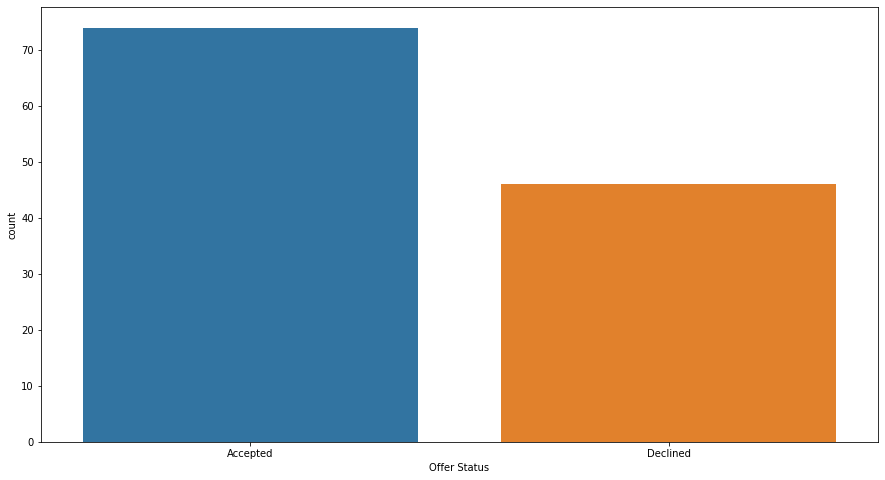

In [20]:
# Checking whether data is balanced or not

plt.figure(figsize=(15,8)) 
import seaborn as sns
sns.countplot(x='Offer Status', data=df)
plt.show()

In [21]:
ca = len(df[df['Offer Status']=='Accepted'])
cd = len(df[df['Offer Status']=='Declined'])
ca_pct = ca/(ca+cd)
print("percentage of offer accepted", round(ca_pct*100, 2))
cd_pct = cd/(ca+cd)
print("percentage of offer declined", round(cd_pct*100, 2))

percentage of offer accepted 61.67
percentage of offer declined 38.33


#### Creating new features as follows:
#### 1) Loc_Bin: Is the current location and job location same, yes = 1 & no = 0
#### 2) Offer_Bin: Offer Accepted = 1; Offer Declined = 0

In [22]:
# Creating new variables as mentioned above and then dropping 'Current Location', 'Offered Location' & 'Offer Status' columns

df['Loc_Bin'] = np.where(df['Current Location'] == df['Offered Location'], 1, 0)
df['Offer_Bin'] = np.where(df['Offer Status'] == 'Accepted', 1, 0)
df = df.drop(['Current Location', 'Offered Location', 'Offer Status'], axis=1)
df

,Exp (Yrs),Current Salary,Expected Salary,Offered Salary,Feature_Total,Loc_Bin,Offer_Bin
0,2,659000,1230000,1220000,35.0,0,1
1,1,725000,1860000,1220000,10.0,1,0
2,1,755000,1290000,1230000,11.0,1,1
3,1,600000,1020000,700000,48.0,1,0
4,1,684000,1240000,1100000,7.0,1,0
...,...,...,...,...,...,...,...
115,8,3353000,4570000,3710000,18.0,1,0
116,1,765000,3240000,1090000,15.0,1,0
117,3,3631000,4180000,3000000,14.0,0,0
118,12,2650000,3090000,2960000,30.0,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exp (Yrs)        120 non-null    int64  
 1   Current Salary   120 non-null    int64  
 2   Expected Salary  120 non-null    int64  
 3   Offered Salary   120 non-null    int64  
 4   Feature_Total    120 non-null    float64
 5   Loc_Bin          120 non-null    int32  
 6   Offer_Bin        120 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 5.8 KB


In [24]:
# Implementing Logistic Regression model

cols = ['Exp (Yrs)','Current Salary', 'Expected Salary', 'Offered Salary', 'Feature_Total', 'Loc_Bin']
X = df[cols]
y = df['Offer_Bin']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.370328
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.444     
Dependent Variable: Offer_Bin        AIC:              100.8788  
Date:               2022-08-13 19:45 BIC:              117.6038  
No. Observations:   120              Log-Likelihood:   -44.439   
Df Model:           5                LL-Null:          -79.881   
Df Residuals:       114              LLR p-value:      6.7131e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Exp (Yrs)         -0.1127   0.1881 -0.5991 0.5491 -0.4812  0.2559
Current Salary    -0.0000   0.0000 -2.2412 0.0250 -0.0000 -0.0000


In [25]:
# Splitting data and applying regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100000)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Checking Accuracy of Model

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression model on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression model on test set: 0.86


              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.88      0.92      0.90        25

    accuracy                           0.86        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.86      0.86      0.86        36



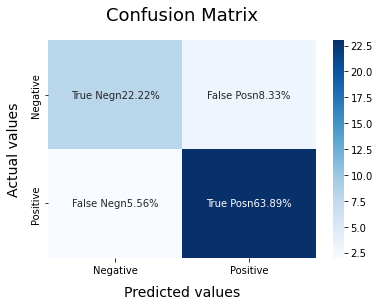

In [27]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

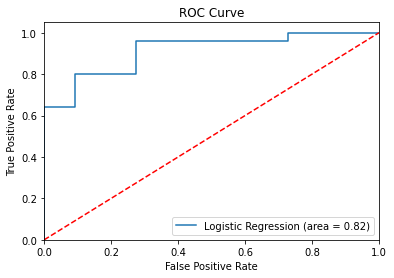

In [28]:
# Plotting the ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Checking Prediction

new_array = np.array(([8,785000,1020500,1012650,34,1],[2,650000,810000,675000,18,1]))

X_new = pd.DataFrame(new_array, columns= ['Exp (Yrs)','Current Salary', 'Expected Salary', 'Offered Salary', 'Feature_Total', 'Loc_Bin'])
X_new

,Exp (Yrs),Current Salary,Expected Salary,Offered Salary,Feature_Total,Loc_Bin
0,8,785000,1020500,1012650,34,1
1,2,650000,810000,675000,18,1


In [30]:
y_pred_new = logreg.predict(X_new)
X_new['Predicted_Offer'] = np.where(y_pred_new == 1, 'Accept', 'Decline')
X_new

,Exp (Yrs),Current Salary,Expected Salary,Offered Salary,Feature_Total,Loc_Bin,Predicted_Offer
0,8,785000,1020500,1012650,34,1,Accept
1,2,650000,810000,675000,18,1,Decline


<hr style="border:2px solid gray">